In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

from matplotlib.ticker import PercentFormatter


myFmt1 = PercentFormatter(xmax=1, decimals=0, symbol=' %')

myFmt100 = PercentFormatter(xmax=100, decimals=0, symbol=' %')


df = pd.read_csv('http://taanila.fi/employee.csv')

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.pivot_table(values = 'Education', index = ['Gender', 'EducationField'])

Education
Gender EducationField             
Female Human Resources    3.125000
       Life Sciences      2.991667
       Marketing          3.144928
       Medical            2.794737
       Other              2.827586
       Technical Degree   2.923077
Male   Human Resources    3.105263
       Life Sciences      2.887978
       Marketing          3.111111
       Medical            2.810219
       Other              3.207547
       Technical Degree   2.762500

In [5]:
Education = [ 'Below College' , 'College' , 'Bachelor' , 'Master' , 'Doctor']

Gender = ['Female', 'Male']

df1 = pd.crosstab(df['Education'], 'n')
df1.index = Education
df1.columns.name = 'Education'
df1

Education,n
Below College,170
College,282
Bachelor,572
Master,398
Doctor,48


In [6]:
df1['%'] = df1/df1.sum()*100

df1.style.format({'%': '{:.1f} %'})

Education,n,%
Below College,170,11.6 %
College,282,19.2 %
Bachelor,572,38.9 %
Master,398,27.1 %
Doctor,48,3.3 %


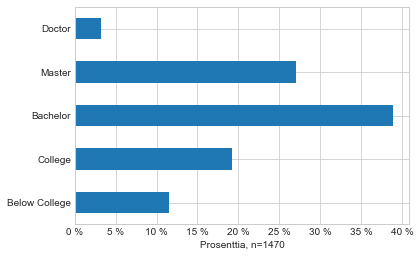

In [7]:
ax1 = df1['%'].plot.barh()

n = df1['n'].sum()
ax1.set_xlabel('Prosenttia, n=' + str(n))

ax1.xaxis.set_major_formatter(myFmt100)

In [8]:
df2 = pd.crosstab(df['Education'], df['Gender'])

df2.index = Education
df2.columns = Gender

df2

,Female,Male
Below College,60,110
College,117,165
Bachelor,235,337
Master,154,244
Doctor,22,26


In [11]:
df3 = pd.crosstab(df['Education'], df['Gender'], normalize = 'columns')

df3.index = Education

Female = df['Education'][df['Gender']==1].count()
Male = df['Education'][df['Gender']==2].count()
df3.columns = ['Female, n=' + str(Female),'Male, n=' + str(Male)]

(df3*100).style.format('{:.1f} %')

,"Female, n=0","Male, n=0"
Below College,10.2 %,12.5 %
College,19.9 %,18.7 %
Bachelor,40.0 %,38.2 %
Master,26.2 %,27.7 %
Doctor,3.7 %,2.9 %


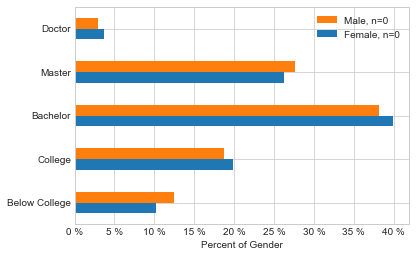

In [12]:
ax2 = df3.plot.barh(legend='reverse')
ax2.set_xlabel('Percent of Gender')
ax2.xaxis.set_major_formatter(myFmt1)

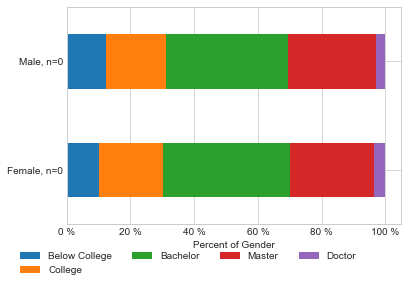

In [14]:
ax3 = df3.T.plot.barh(stacked = True)
ax3.set_xlabel('Percent of Gender')
ax3.legend(loc=(-0.15, -0.25), ncol=4)
ax3.xaxis.set_major_formatter(myFmt1)